In [1]:
from utils import DeepWalk

import networkx as nx
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# A primer: vanilla DeepWalk on Karate Club graph to test my DeepWalk implementation 

In [2]:
G = nx.karate_club_graph()

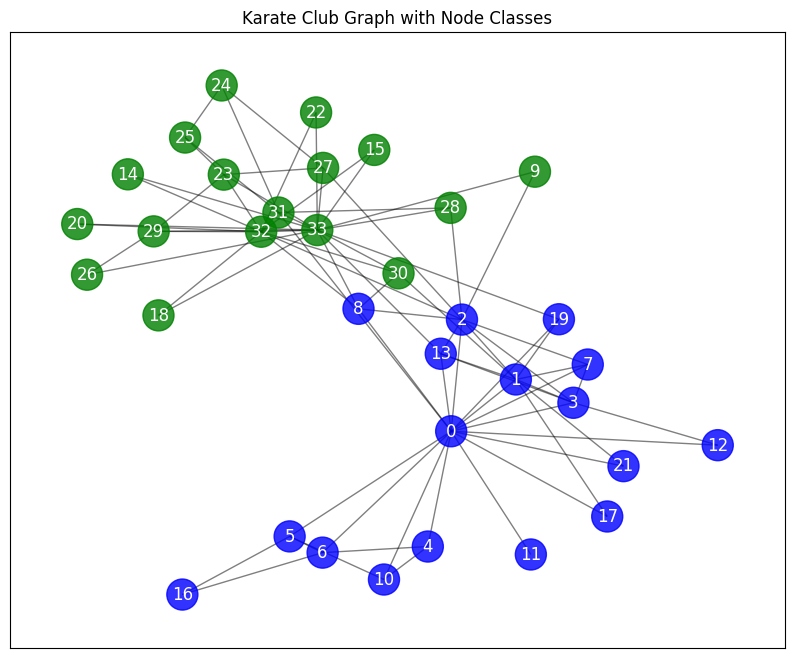

In [3]:
club_colors = {
    'Mr. Hi': 'blue',
    'Officer': 'green'
}

node_colors = [club_colors[G.nodes[node]['club']] for node in G.nodes]

pos = nx.spring_layout(G)  

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='white')

plt.title("Karate Club Graph with Node Classes")
plt.show()

In [28]:
model = DeepWalk(G, 10, 128, 100, 30, 0.025)

In [29]:
model.train()

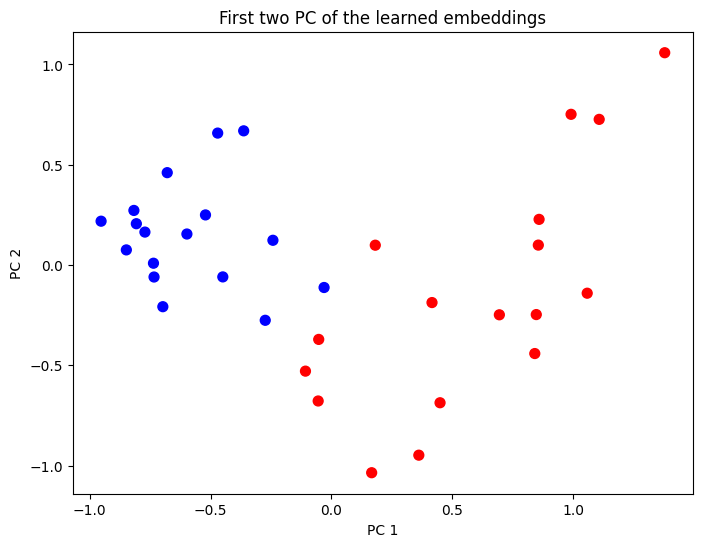

In [30]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(model.Phi)

pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, s=50, color=node_colors)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('First two PC of the learned embeddings')
plt.show()